In [ ]:
!pip install xgboost


In [ ]:
# =====================================================
# 1. Import Required Libraries
# =====================================================
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# =====================================================
# 2. Load Built-in Diabetes Dataset
# =====================================================
X, y = load_diabetes(return_X_y=True)


# =====================================================
# 3. Train-Test Split
# =====================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# =====================================================
# 4. Train Random Forest Regressor
# =====================================================
rf_model = RandomForestRegressor(
    n_estimators=100,     # number of trees
    max_depth=10,         # limit depth to avoid overfitting
    random_state=42
)

rf_model.fit(X_train, y_train)


# =====================================================
# 5. Predictions
# =====================================================
y_pred = rf_model.predict(X_test)


# =====================================================
# 6. Evaluation Metrics
# =====================================================
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Random Forest Regression Results (Diabetes Dataset)")
print("--------------------------------------------------")
print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.2f}")


Random Forest Regression Results (Diabetes Dataset)
--------------------------------------------------
MAE  : 44.38
MSE  : 2974.20
RMSE : 54.54
R²   : 0.44


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:29:17] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.956140350877193


/usr/local/lib/python3.12/dist-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


<Figure size 2000x1000 with 0 Axes>

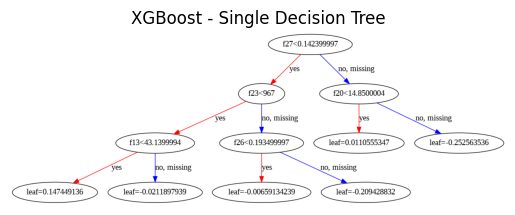

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:29:18] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


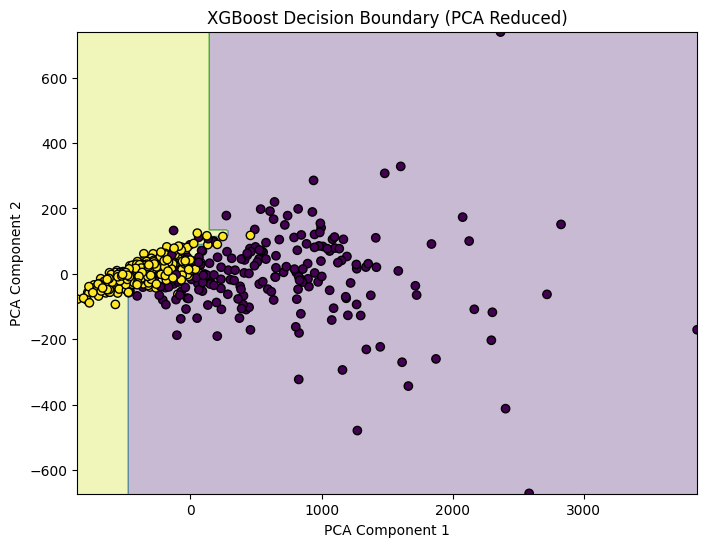

In [ ]:

# 1. Install XGBoost

!pip install xgboost



# 2. Import Libraries

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

from xgboost import XGBClassifier, plot_tree


# 3. Load Dataset

data = load_breast_cancer()
X = data.data
y = data.target



# 4. Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# 5. Train XGBoost Model

xgb_model = XGBClassifier(
    n_estimators=50,
    max_depth=3,
    learning_rate=0.1,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)

# 6. Evaluate Model

y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



# 7. Visualize One XGBoost Tree

plt.figure(figsize=(20, 10))
plot_tree(xgb_model, num_trees=0)
plt.title("XGBoost - Single Decision Tree")
plt.show()



# 8. PCA for Decision Boundary (2D)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)



# 9. Train XGBoost on PCA Data

xgb_pca = XGBClassifier(
    n_estimators=50,
    max_depth=3,
    learning_rate=0.1,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_pca.fit(X_train_pca, y_train_pca)


# 10. Plot Decision Boundary

x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

Z = xgb_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='k')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("XGBoost Decision Boundary (PCA Reduced)")
plt.show()


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:30:45] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.7532467532467533


/usr/local/lib/python3.12/dist-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


<Figure size 2000x1000 with 0 Axes>

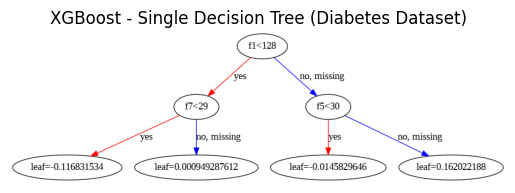

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:30:46] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


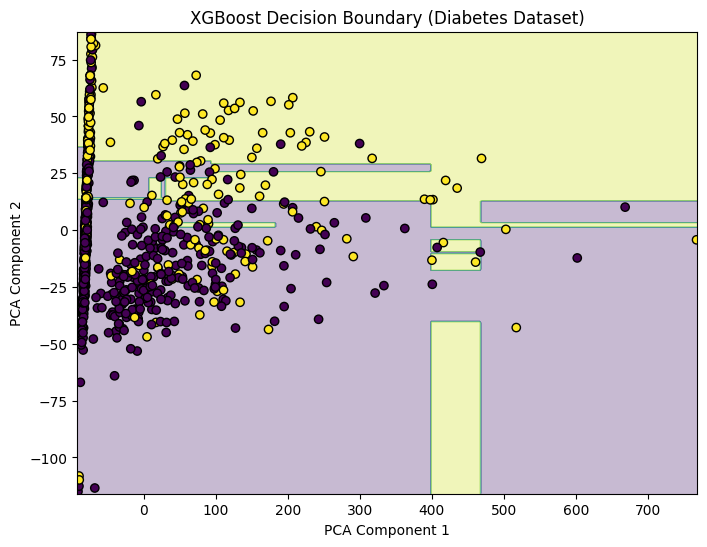

In [ ]:

# 1. Install XGBoost

!pip install xgboost


# 2. Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

from xgboost import XGBClassifier, plot_tree

# 3. Load PIMA Indians Diabetes Dataset

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

columns = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
    "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"
]

df = pd.read_csv(url, names=columns)

X = df.drop("Outcome", axis=1).values
y = df["Outcome"].values



# 4. Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



# 5. Train XGBoost Model

xgb_model = XGBClassifier(
    n_estimators=50,
    max_depth=2,
    learning_rate=0.1,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)

xgb_model.fit(X_train, y_train)


# 6. Evaluate Model

y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 7. Visualize One XGBoost Tree

plt.figure(figsize=(20, 10))
plot_tree(xgb_model, num_trees=0)
plt.title("XGBoost - Single Decision Tree (Diabetes Dataset)")
plt.show()



# 8. PCA for Decision Boundary (2D)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)



# 9. Train XGBoost on PCA Data

xgb_pca = XGBClassifier(
    n_estimators=50,
    max_depth=3,
    learning_rate=0.1,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)

xgb_pca.fit(X_train_pca, y_train_pca)


# 10. Plot Decision Boundary

x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

Z = xgb_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor="k")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("XGBoost Decision Boundary (Diabetes Dataset)")
plt.show()
